# Import dependencies

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from itertools import cycle
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load the dataset

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# First look at data

In [0]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# Analysing sale price

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


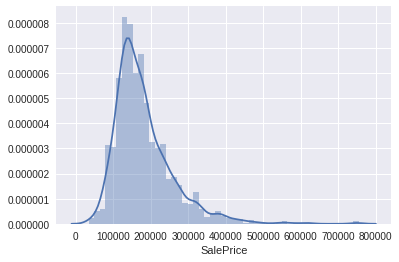

In [0]:
sns.distplot(train['SalePrice'])

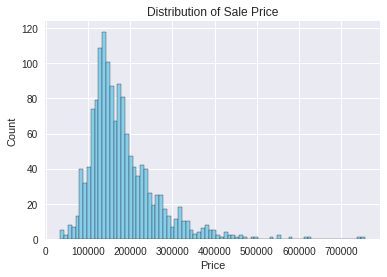

In [0]:
plt.hist(train['SalePrice'], bins=80, edgecolor='k', color='skyblue')
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Distribution of Sale Price')
plt.show()

1. Positive skedness
2. Peak
3. Not normal
4. Possible outliers

# Analyzing relationship of different "important" with target (selected intuitively)

#### Quantitative Variables with possible strong relationship:
1. LotArea
2. GrLivArea
3. TotalBsmtSF
4. GarageArea

#### Qualitative Variables with possible strong relationship:
##### *More prominent*
1. YearBuilt
2. OverallQual
3. BedroomAbvGr

##### *Less Prominent*
1. Street
2. Alley
3. LotShape
4. LandContour
5. LotConfig
6. BldgType
7. RoofStyle
8. ExterQual
9. Foundation
10. BsmtQual
11. HeatingQC
12. CentralAIr
13. KitchenQual
14. GarageCars
15. GarageQual
16. SaleType
17. SaleCondition

Lets explore the quantitative variables first

## Quantitative features

In [0]:
color_list = [(0.0, 0.352, 0.8),
              (0.8, 0.048, 0.0), 
              (0.448, 0.0, 0.8),
              (0.5, 0.5, 0.5),
              (0.8, 0.448, 0.0),
              (0.048, 0.0, 0.8),
              (0.8, 0.0, 0.752),
              (0.752, 0.8, 0.0),
              (0.0, 0.8, 0.048),
              (0.0, 0.752, 0.8)]

cycol = cycle(color_list)

In [0]:
quant_feat = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

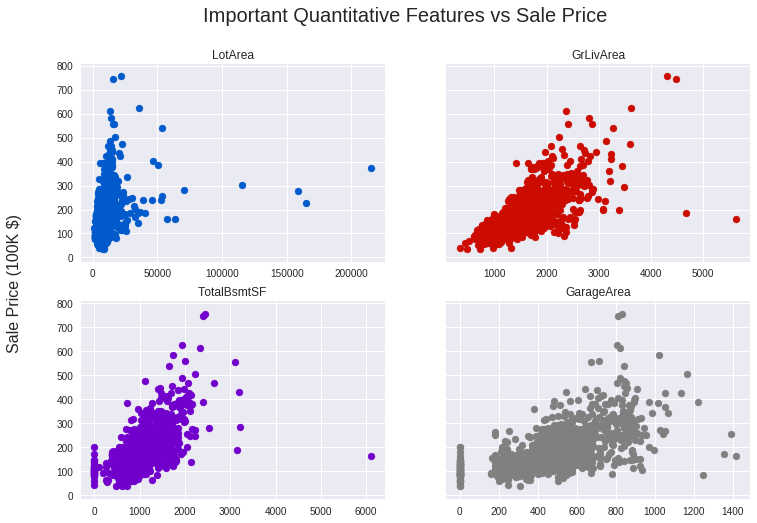

In [0]:
fig, axs = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(12,8))
fig.suptitle('Important Quantitative Features vs Sale Price', fontsize=20)
fig.text(0.04, 0.5, 'Sale Price (100K $)', va='center', rotation='vertical', fontdict={'fontsize': 16})

num = 0
for i in range(2):
    for j in range(2):
        axs[i, j].scatter(x=train[quant_feat[num]], y=train['SalePrice']/1000.0, color=next(cycol))
        axs[i, j].set_title(quant_feat[num])
        num += 1

*Gross Livable Area* and *Total Basement Surface area* share a very strong relationship with Sale Price(with some outliers)<br/>
The relationship of Sale Price with *Garage Area* is also strong but more scattered

## Important Qualitative Features

In [0]:
imp_qual_feat = ['OverallQual', 'BedroomAbvGr', 'YearBuilt', 'Neighborhood']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


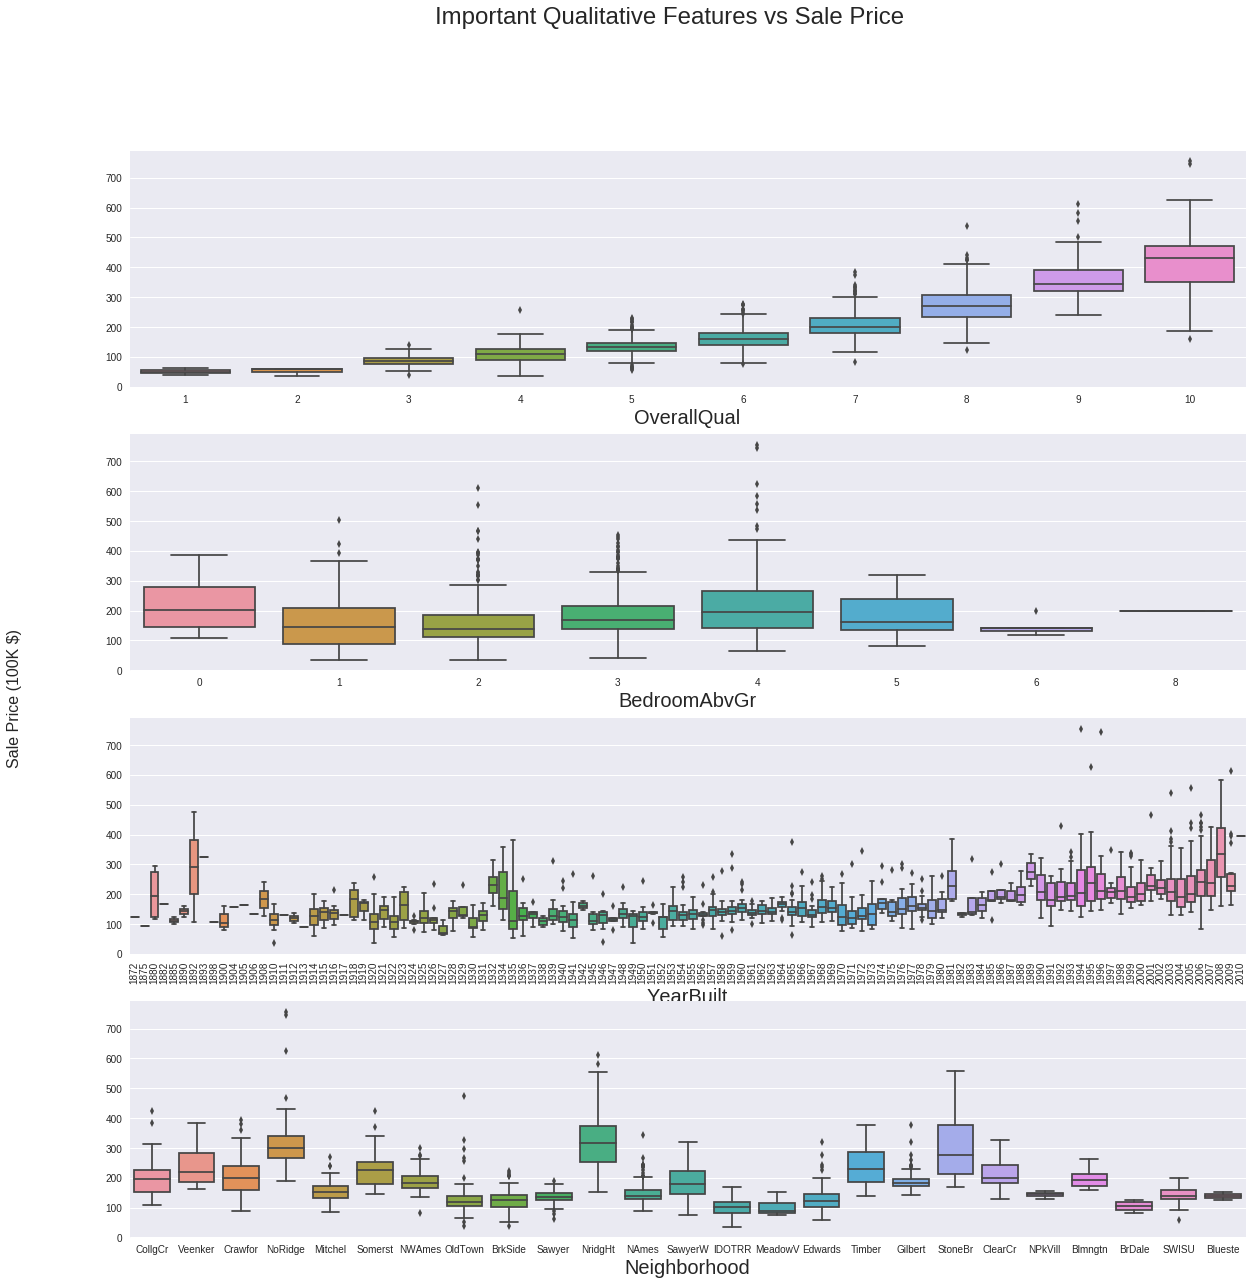

In [0]:
fig, axs = plt.subplots(4, sharex=False, sharey=False, figsize=(20,20))
fig.suptitle('Important Qualitative Features vs Sale Price', fontsize=24)
fig.text(0.04, 0.5, 'Sale Price (100K $)', va='center', rotation='vertical', fontdict={'fontsize': 16})

for i in range(4):
    sns.boxplot(x=train[imp_qual_feat[i]], y=train['SalePrice']/1000.0, ax=axs[i])
    axs[i].set_ylabel('')
    axs[i].set_xlabel(axs[i].get_xlabel(),size=20)
    if imp_qual_feat[i] == 'YearBuilt':
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

Findings:
1. SalePrice shares a very strong relationship with the Overall Quality
2. No. of Bedroom abover ground level doesn't seem to affect much the Sale Price
3. The Sale Price sees a very slight increase as we move from old houses to newly built houses. But there are a few exceptions in between like the years *1880, 1892, 1932-35, 1981*
4. The neighborhood also seems to have some affect to the Sale Price. For some neighborhhods like *StoneBr, NoRidge, NridgHt* Sale Prices are pretty high, whereas for many others they are pretty low

# Feature Engineering

### Correlation Matrix

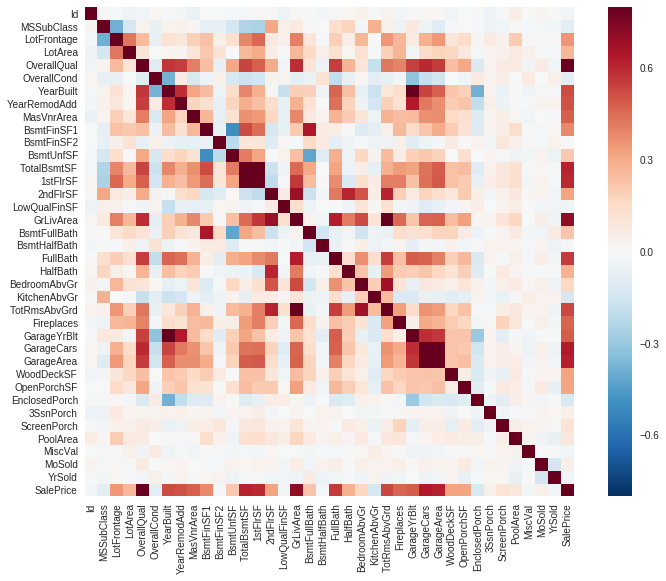

In [0]:
corr_mat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True)

### Correlation matrix of strongest variables

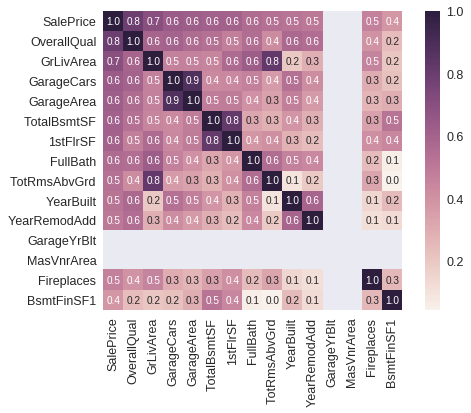

In [0]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Relationships:
1. OverallQual and GrLivArea are strongly related with SalePrice
2. GarageCars and GarageArea are also related strongly but both of these features give similar info, so we will take only one of them, let it be GarageArea
3. Similarly we will choose 1 from TotalBsntSF and 1stFlrSF
4. Again, 1 from TotRmsAbvGrd and GrLivArea
5. FullBath is strongly related
6. Other strong features are - Fireplaces, YearBuilt

### Scatterplot matrix of strong features

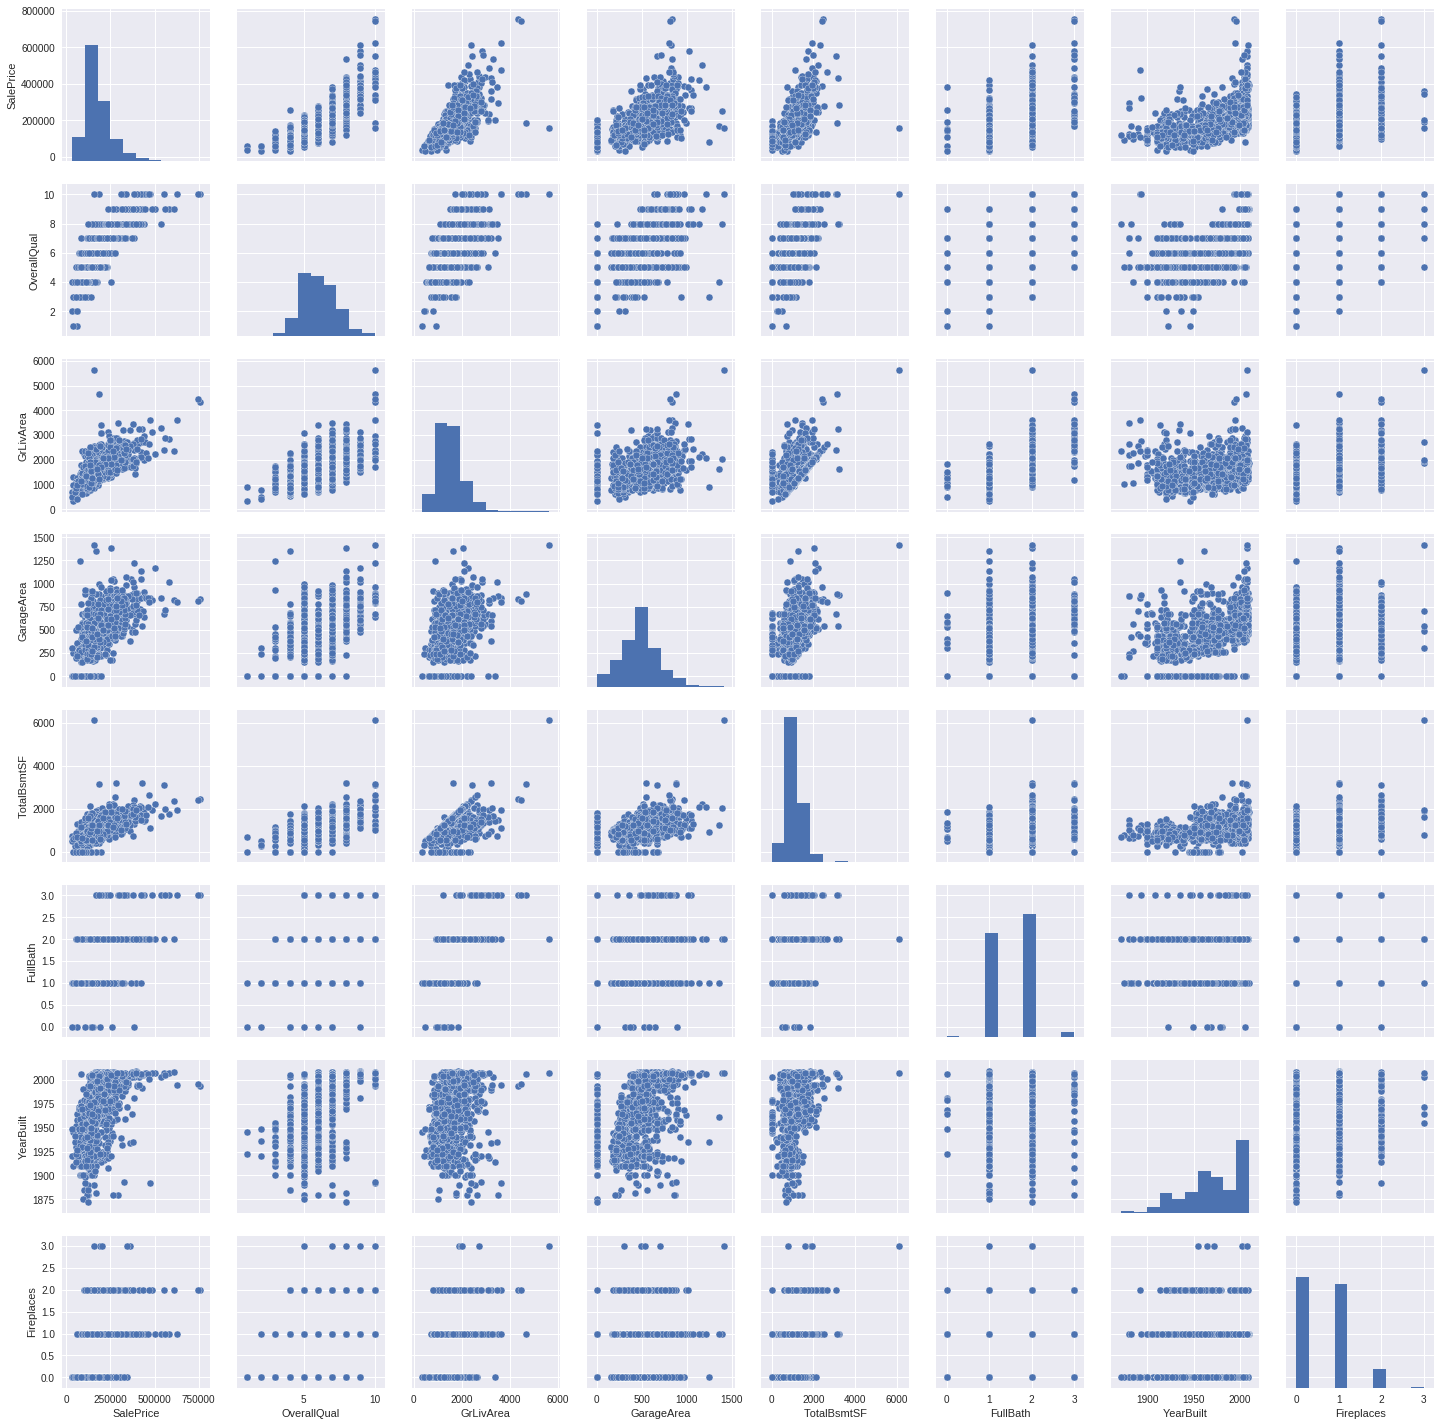

In [0]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'Fireplaces']
sns.pairplot(train[cols], size = 2.5)
plt.show()

# Missing Data

In [0]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


A good approach will be to delete the features or don't consider them, which have more than 15% data missing. Also, while deleting these features, take care of the fact that none of them are on of the strong features selected above

The GarageX and BsmtX Variables above are not required as most of the info is being covered by GarageArea and TotalBsmtSF variables already selected.

MasVnrArea and MasVnrType are also very less essential features so we will delete them too

Electrical has only 1 missing observation, so we will delete that observation but will keep the variable

In [0]:
# Dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() # Just checking that there's no missing data missing...

0

# Outliers

### Univariate Analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [0]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



*   Low range values are similar and not too far from 0.
*   High range values are far from 0 and the 7.something values are really out of range.



### Bivariate Analysis

Bivariate analysis SalePrice/GrLivArea

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


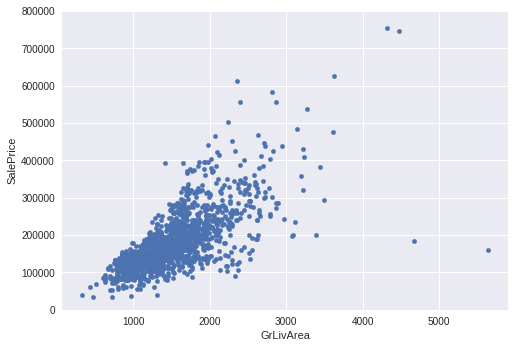

In [0]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))



*   The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
*   The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.



In [0]:
# Deleting points
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

Bivariate analysis SalePrice/TotalBsmtSF

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


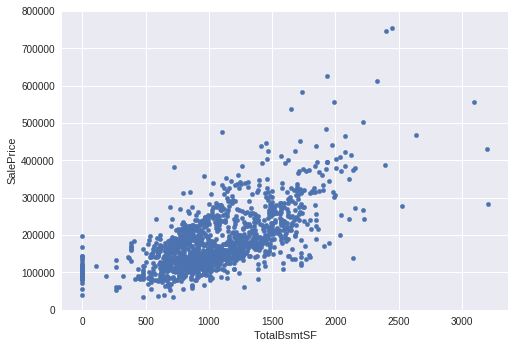

In [0]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

Nothing "too" suspicious found here

# Statistical Analysis

Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

### Normality

##### SalePrice

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


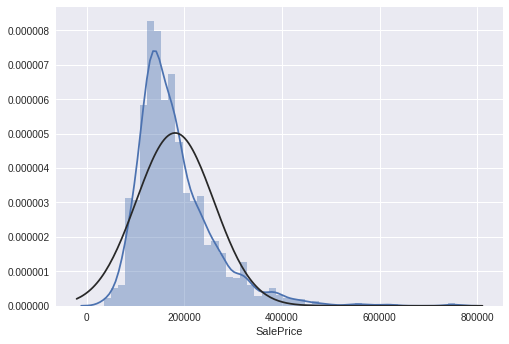

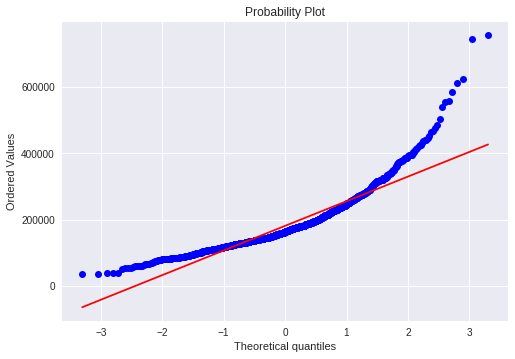

In [0]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

A simple data transformation can solve the problem. In case of positive skewness, log transformations usually works well.

In [0]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


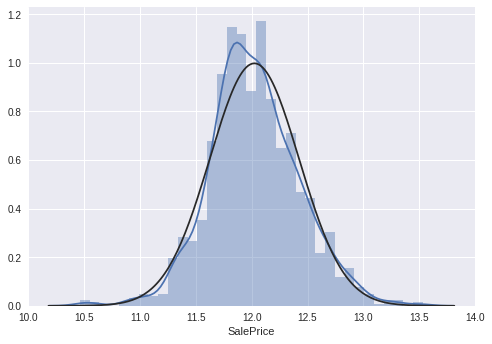

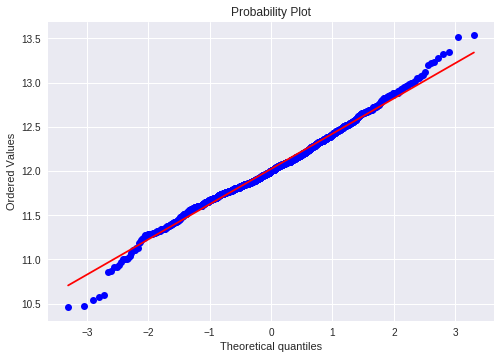

In [0]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

##### GrLivArea

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


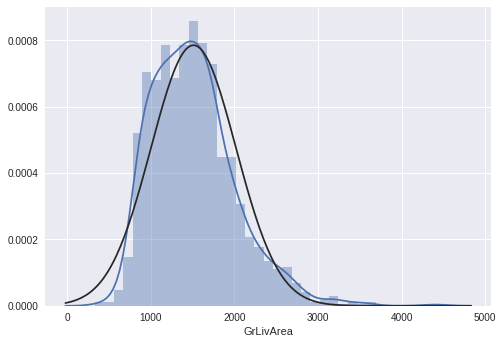

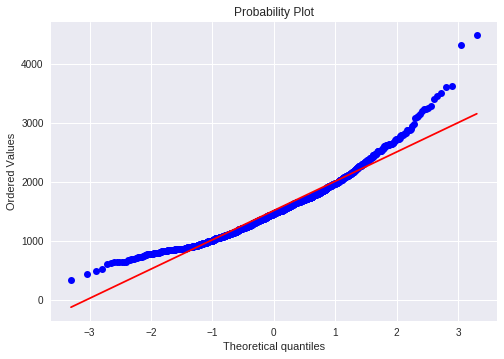

In [0]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

In [0]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


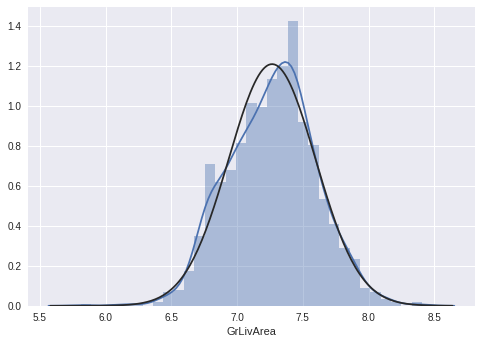

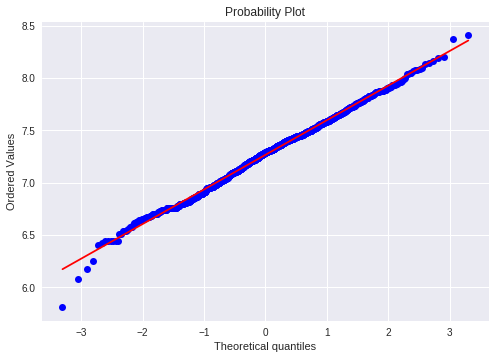

In [0]:
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

##### TotalBsmtSF

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


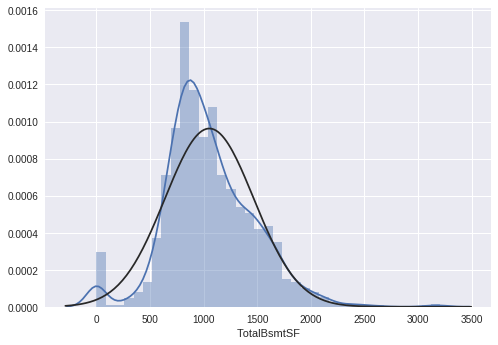

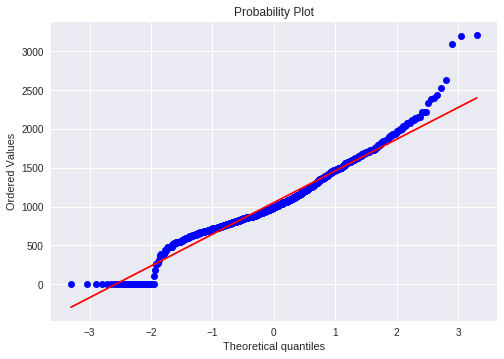

In [0]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

We can't apply log transformation here because of large number of 0 values (Houses with no Basement)

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [0]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


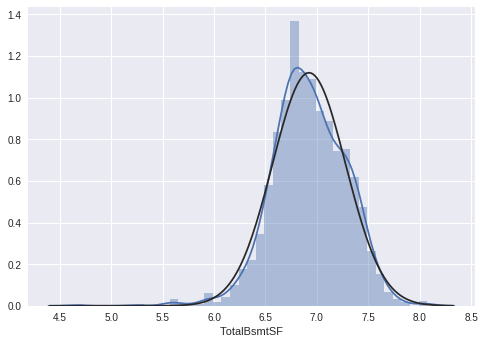

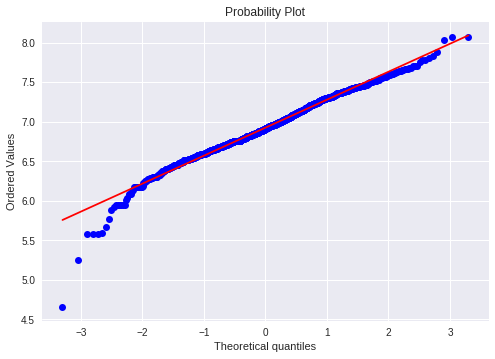

In [0]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### Homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

##### SalePrice and GrLivArea

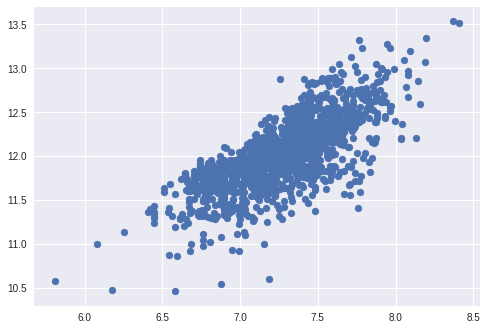

In [0]:
#scatter plot
plt.scatter(train['GrLivArea'], train['SalePrice'])

Its no longer cone shaped spread. Just by ensuring normality in some variables, we solved the homoscedasticity problem

##### SalePrice and TotalBsmtSF

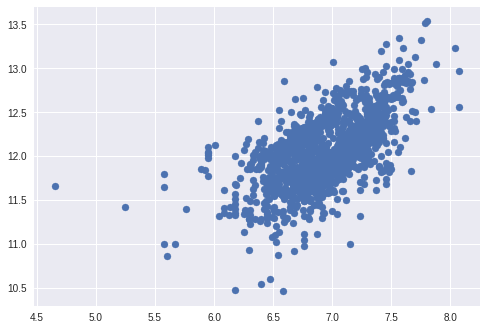

In [0]:
#scatter plot
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice'])

# Dummy Variables

In [0]:
#convert categorical variable into dummy
train = pd.get_dummies(train)

In [0]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


# Export processed Train data to csv file

In [0]:
train.to_csv('train_processed.csv', index=None, header=True)